You need to have a working copy of XSpec for this to work. Also, you need the HEADAS environment variable pointing to the build of HEASOFT before starting this kernel, otherwise XSpec models will not be found nor imported.

In [1]:
from threeML import *

%matplotlib inline

Configuration read from /Users/jburgess/.threeML/threeML_config.yml
Loading xspec models...


WARNING RuntimeWarning: The current value of the parameter switch was above the new maximum 1.0.


WARNING RuntimeWarning: The current value of the parameter specfile was above the new maximum 1.0.



done



WARNING CannotImportPlugin: Could not import plugin /usr/local/lib/python2.7/site-packages/threeML-0.2.0-py2.7.egg/threeML/plugins/FermiGBM_TTE_Like.py. Do you have the relative instrument software installed and configured?


WARNING CannotImportPlugin: Could not import plugin /usr/local/lib/python2.7/site-packages/threeML-0.2.0-py2.7.egg/threeML/plugins/FermiLATLike.py. Do you have the relative instrument software installed and configured?


WARNING CannotImportPlugin: Could not import plugin /usr/local/lib/python2.7/site-packages/threeML-0.2.0-py2.7.egg/threeML/plugins/HAWCLike.py. Do you have the relative instrument software installed and configured?


WARNING CannotImportPlugin: Could not import plugin /usr/local/lib/python2.7/site-packages/threeML-0.2.0-py2.7.egg/threeML/plugins/SherpaLike.py. Do you have the relative instrument software installed and configured?



In [2]:
data_dir = 'xrt'

xrt = SwiftXRTLike("xrt",
                   os.path.join(data_dir, "interval0wt.pi"),
                   os.path.join(data_dir, "interval0wtback.pi"),
                   os.path.join(data_dir, "interval0wt.rmf.gz"),
                   os.path.join(data_dir, "interval0wt.arf"))

xrt.set_active_measurements("0.3-10.0")

Now using 971 channels out of 1024


In [3]:
xspec_abund("wilm")

spectral_model = XS_phabs() * XS_zphabs() * XS_powerlaw()

In [4]:
pts1 = PointSource("grb",ra=0.0,dec=0.0,spectral_shape=spectral_model)

In [5]:
model = Model(pts1)

data = DataList(xrt)

jl = JointLikelihood(model, data, verbose=False)

In [6]:
model.display()

name,value,min_value,max_value,unit,delta,free
grb.spectrum.main.composite.nh_1_1,1.0,0.0,1000000.0,1e+22,0.001,True
grb.spectrum.main.composite.nh_2_2,1.0,0.0,1000000.0,1e+22,0.001,True
grb.spectrum.main.composite.redshift_2_2,0.0,-0.999,10.0,,0.01,True
grb.spectrum.main.composite.phoindex_3,1.0,-3.0,10.0,,0.01,True
grb.spectrum.main.composite.norm_3,1.0,0.0,None,keV / (cm2 s),0.1,True


In [9]:
spectral_model.nh_1_1 = 7.73891E-02
spectral_model.nh_1_1.fix = True

spectral_model.nh_2_2 = 1.06151
spectral_model.redshift_2_2 = 0.555000
spectral_model.redshift_2_2.fix = True

spectral_model.phoindex_3 = 2.294
spectral_model.phoindex_3.delta = 0.3
spectral_model.norm_3.bounds = (1e-5, 10)
spectral_model.norm_3 = 1.446

In [10]:
res = jl.fit()

Best fit values:



Name,Value,Unit
grb.spectrum.main.composite.nh_2_2,0.765 +/- 0.026,1e+22
grb.spectrum.main.composite.phoindex_3,2.106 +/- 0.022,
grb.spectrum.main.composite.norm_3,1.285 +/- 0.029,keV / (cm2 s)



NOTE: errors on parameters are approximate. Use get_errors().

Nuisance parameters:



Name,Value,Unit
InterCalib_of_xrt,1,



Correlation matrix:



1.00,0.75,0.87
0.75,1.00,0.89
0.87,0.89,1.00



Minimum of -logLikelihood is: 5266.97194664

Contributions to the -logLikelihood at the minimum:



Detector,-LogL
xrt,5266.97


In [9]:
# In the bayesian analysis we can free also parameters which would be unconstrained

spectral_model.nh_2_2.prior = Log_uniform_prior(lower_bound=1e-5,upper_bound=1000)

spectral_model.phoindex_3.set_uninformative_prior(Uniform_prior)

spectral_model.norm_3.prior = Log_uniform_prior(lower_bound=1e-5,upper_bound=1000)

In [10]:
bs = BayesianAnalysis(model, data)

In [11]:
samples = bs.sample(16,100,200)

Running burn-in of 100 samples...

 [*********************100%***********************]  completed in 28.7 s

Sampling...

 [*********************100%***********************]  completed in 71.9 s
Mean acceptance fraction: 0.65375


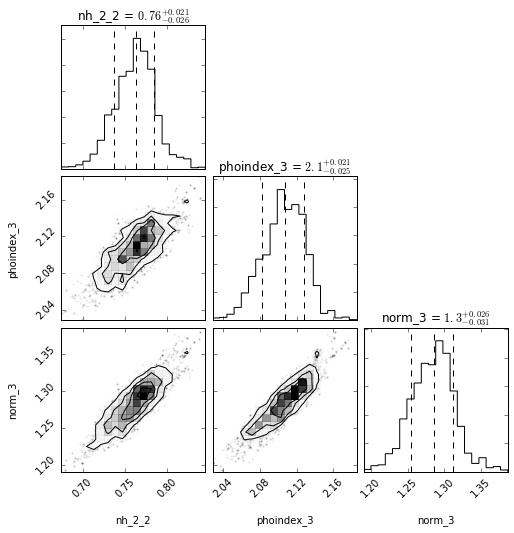

In [12]:
_ = bs.corner_plot()